<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [2]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


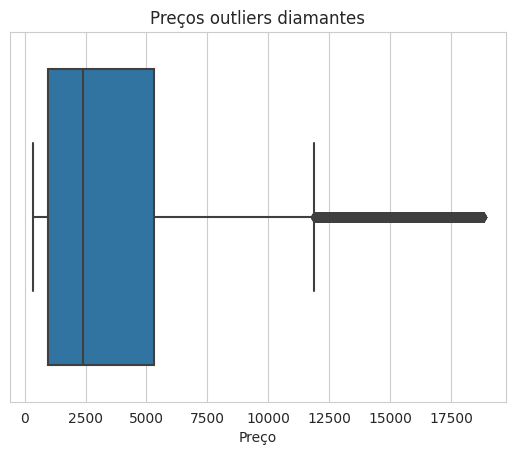

In [14]:
# gráfico do exercício 1

with sns.axes_style("whitegrid"):

  diamonds = sns.boxplot(x=data["price"])
  diamonds.set(title="Preços outliers diamantes", xlabel="Preço")

**Insight do gráfico 1**:
* Os preços se estendem do 0 ate 11000 tendo os maiores valores concentrados ente 0 a 5500.
* Os pontos fora da curva "outliers" se inicia nos 11000 e chega ultrapassar os 17500.

---

## 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [15]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [16]:
# gráfico do exercício 2

diamonds = data[["price", "carat", "clarity"]]
diamonds.head()

,price,carat,clarity
0,326,0.23,SI2
1,326,0.21,SI1
2,327,0.23,VS1
3,334,0.29,VS2
4,335,0.31,SI2


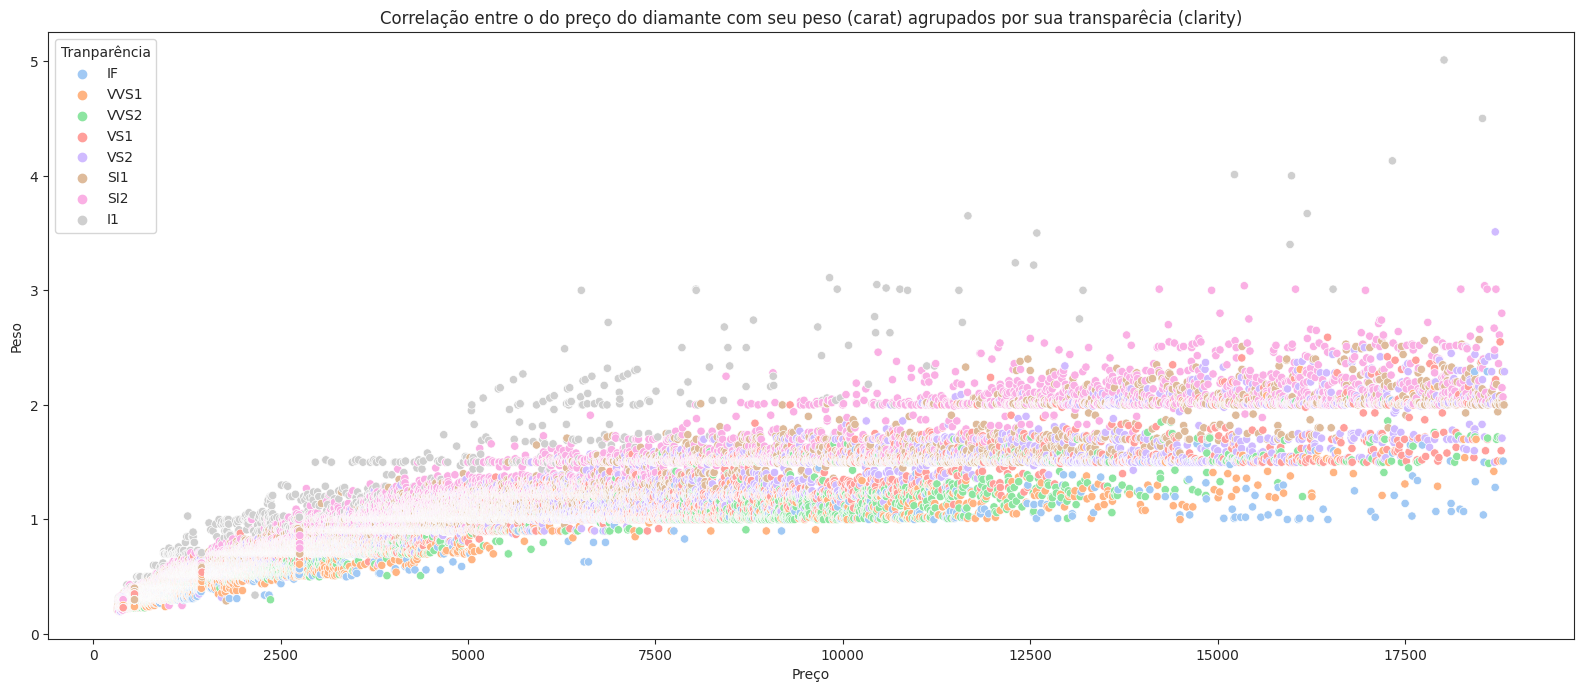

In [35]:
with sns.axes_style("ticks"):

  grafico = sns.scatterplot(data=diamonds, x="price", y="carat", hue="clarity", palette="pastel")
  grafico.set(title="Correlação entre o do preço do diamante com seu peso (carat) agrupados por sua transparêcia (clarity)", xlabel="Preço", ylabel="Peso")
  grafico.figure.set_size_inches(w=50/2.54, h=20/2.54)
  grafico.get_legend().set_title("Tranparência")


**Insight do gráfico 2**:
 * Quanto menor o peso e maior o preço do diamante mais provável de ser de clareza ("IF, VVS1, VVS2")
 * Entre o peso de 1,5 e 2,0 maiores são as chances desse diamente ser de clareza ("VS1, VS2, SI1, SI2, I1")
 * A partir do peso de 3,0 o diamante é de clareza I1 e o preço parece ter correlação com o peso do diamante dessa clareza, o gráfico nos mostra que quanto maior o peso maior se torna seu preço.

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [36]:
import seaborn as sns

data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


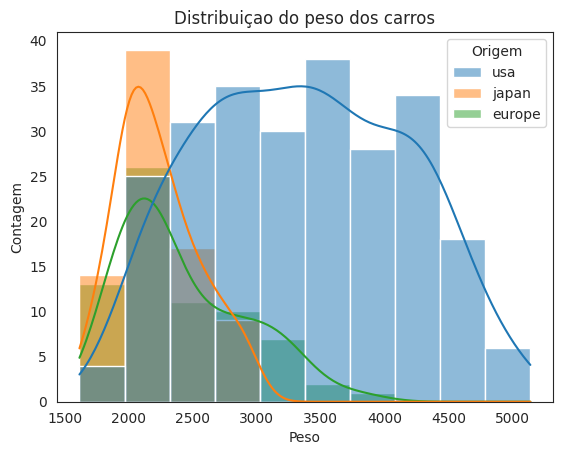

In [38]:
# gráfico do exercício 3

cars = data[["weight", "origin"]]

with sns.axes_style("white"):
  grafico = sns.histplot(data=cars, x="weight", hue="origin", kde=True)
  grafico.set(title="Distribuiçao do peso dos carros de acordo com a origem", xlabel="Peso", ylabel="Contagem");
  grafico.get_legend().set_title("Origem");

**Insight do gráfico 3**:
* Entre 1500 a 2000kg a origem do carro tem maior probabilidade de ser japones ou europeu.
* A partir de 2500 ate os 5000kg os carros de origem europeu e japones tem uma grande decadência chegando a 0, enquanto os carros americanos representam a maior porcentagem.

Sendo assim conseguimos concluir que quanto maior o peso do carro maiores são as chances desse carro ser americano, enquanto os fabricantes europes e japoneses representam maiores quantidades entre os carros fabricados com peso de 1500 a 2250kg. Acima disso os números diminuem e os carros americanos representam os maiores valores.


---